## Calculate Avogadro’s number based on Perrin’s experiment

Table 1.
| Time intervals | $\lambda_x^2$ | $\text{N/mol}^{-1}$ |
| --- | --- | --- |
| $30 \, \text{s}$ | $45 \times 10^{-8} \, \text{cm}^2$ |  $68 \times 10^{22}$ |
| $60 \, \text{s}$ | $86.5 \times 10^{-8} \, \text{cm}^2$ |  $70.5 \times 10^{22}$ |
| $90 \, \text{s}$ | $140 \times 10^{-8} \, \text{cm}^2$ |  $71 \times 10^{22}$ |
| $120 \, \text{s}$ | $195 \times 10^{-8} \, \text{cm}^2$ |  $62 \times 10^{22}$ |

Observing displacement under microscope  
$\Rightarrow$ 2D difussion ($\lambda_x^2 = 4Dt$)  
$\Rightarrow$ $\lambda_x^2 \propto t$

Therefore, it is possible to use linear regression to estimate $D$ by assuming:  
$\hat{y} = \beta_1 t$  (no intercept term)  
where $\hat{y}$ is the estimated $\lambda_x^2$, $\beta_1$ is $4D$.

The Avogadro's number $N_A$ can be computed from:  
$D = \frac{RT}{6 \pi N_A \eta r} \Rightarrow N_A = \frac{RT}{6 \pi D \eta r}$ 

$\eta = 0.011 \, g \cdot cm^{-1} \cdot s^{-1}$ (water)  
$R = 8.314 \times 10^7 \, g \cdot cm^2 \cdot s^{-2} \cdot mol^{-1} 
\cdot K^{-1}$  
Assume that $T$ is $300 K$  
particle size $r$? Assume that it is $0.50 \, \mu m =  5 \times 10^{-5} cm$

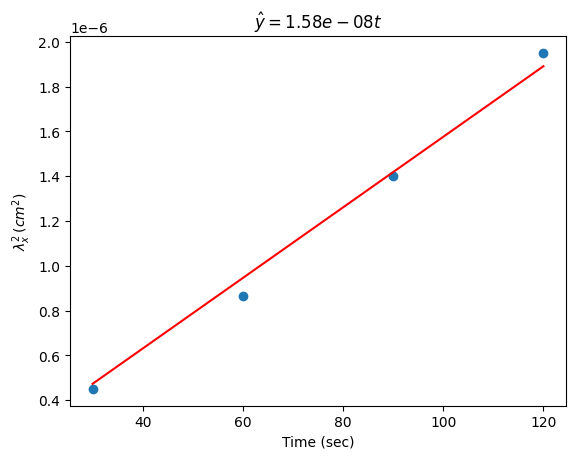

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

displacement = np.array([45e-8, 86.5e-8, 140e-8, 195e-8])
time = np.array([30, 60, 90, 120])
time_reshape = time.reshape(-1, 1)
model = LinearRegression(fit_intercept=False)
model.fit(time_reshape, displacement)
y_pred = model.predict(time_reshape)

plt.scatter(time, displacement)
plt.plot(time, y_pred, color="red")
plt.xlabel("Time (sec)")
plt.ylabel("$\lambda_x^2 \, (cm^2)$")
plt.title(f"$\hat{{y}} = {{{model.coef_[0]:.2e}}} t$")
plt.show()

$\beta_1 = 1.58 \times 10^{-8} = 4D$  
$\Rightarrow D = 3.94 \times 10^{-9} \, \text{cm}^2 \cdot \text{s}^{-1}$

$$
\begin{align*}
N_A &= \frac{RT}{6 \pi D \eta r} \\
&= \frac{(8.314 \times 10^7 \, g \cdot cm^2 \cdot s^{-2} \cdot mol^{-1} 
\cdot K^{-1}) (300 K)}{6 \pi (3.94 \times 10^{-9} \, cm^2 \cdot s^{-1}) (0.011 \, g \cdot cm^{-1} \cdot s^{-1}) (5 \times 10^{-5} cm)} \\
&= 6.11 \times 10^{23} / mol
\end{align*}
$$

### Comments on the results and comparison with Perrin's estimation

In Perrin's experiment, he calculated the Avogadro's number for each time interval first and then averaged the results. In my approach, since the displacement is proportional to the elapsed time, the Avogadro's number can also be estimated from linear regression.

However, linear regression aims to minimize $\sum (y - \hat{y})^2$. Therefore,  for the points with longer time intervals, they will implicitly receive higher weights because a small change in the coefficient $\beta_1$ leads to a huge change in $\hat{y}$. As a result, the estimation leans toward the measurement with a time interval of 120 s, which, in this case, has the smallest estimated Avogadro's number. This causes the linear regression estimate to be smaller than the mean of the individual results. (Another reason could be that I'm not sure where to find the particle size if only given Table 1, so the particle size might not be $5 \times 10^{-5} \, cm$.)